# Importing Packages

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Data Exploration

In [2]:
df= pd.read_csv("tweet_emotions.csv")
df = df[0:5000]

In [3]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

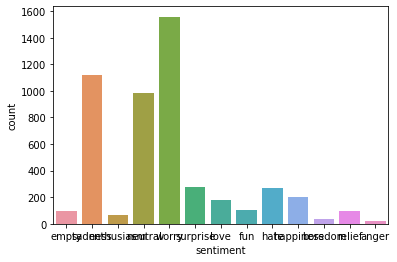

In [4]:
import seaborn as sns
sns.countplot(x="sentiment", data = df)

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
tweet_id     5000 non-null int64
sentiment    5000 non-null object
content      5000 non-null object
dtypes: int64(1), object(2)
memory usage: 156.2+ KB


# Data Cleaning & Processing

In [7]:
def cleaner(text):
    text = text.lower()
    text = re.sub("@[^\s]+","",text)
    text = text.replace(":)","")  
    text = text.replace("@","") 
    text = text.replace("#","") 
    text = text.replace(":(","")
    return text

In [8]:
def remove_stop_words(text):
    sw = stopwords.words("english")
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

In [9]:
def stemming(text):
    ps = PorterStemmer()
    text = text.split()
    stemmed_words = []
    for word in text :
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [10]:
def run(text):
    text = cleaner(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Tru
[nltk_data]     Projects\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df['Message'] = df['content'].apply(run)

In [13]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["Message"])

In [14]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

# Feature Selection

In [15]:
X = x.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y = df['sentiment'].values
y

array([ 2, 10, 10, ..., 10,  9, 12])

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [18]:
te = TransactionEncoder()
te_array = te.fit(df['Message']).transform(df['Message'])
data = pd.DataFrame(te_array, columns=te.columns_)

In [19]:
data

,,!,$,%,&,',(,),*,+,...,x,y,z,{,|,},~,½,¿,ï
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4998,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df

,tweet_id,sentiment,content,Message
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh...waitin call...
2,1956967696,10,Funeral ceremony...gloomy friday...,funer ceremony...gloomi friday...
3,1956967789,3,wants to hang out with friends SOON!,want hang friend soon!
4,1956968416,8,@dannycastillo We want to trade with someone w...,"want trade someon houston tickets, one will."
...,...,...,...,...
4995,1960583096,10,@1Shan no sir...i woulda put honey...but i don...,sir...i woulda put honey...but
4996,1960583151,8,"@JonathanRKnight so, how long have you been at...","so, long airport? smoke insid bar somehting? w..."
4997,1960583193,10,@YankeeGirl20 besides I haven't had strep for ...,besid strep like 10 year reason. i'm tire anyt...
4998,1960583429,9,Glad to see the sun out in Dublin after a grea...,glad see sun dublin great week london. back work


In [23]:
#=fpgrowth(data, min_support=0.02, use_colnames=True)

#frequent_itemsets_fp=fpgrowth(data, min_support=0.02, use_colnames=True)

In [ ]:
#rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [ ]:
#rules_fp

In [ ]:
#frequent_itemsets_fp

# Data Splitting

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  t

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


In [26]:
LR = lr.score(x_test,y_test) * 100

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.04      0.60      0.07         5
           7       0.01      1.00      0.03         1
           8       0.18      0.26      0.21       234
           9       0.00      0.00      0.00         0
          10       0.30      0.31      0.31       346
          11       0.00      0.00      0.00         1
          12       0.73      0.34      0.47      1063

    accuracy                           0.32      1650
   macro avg       0.10      0.19      0.08      1650
weighted avg       0.56      0.32      0.39      1650



C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1,   0,   9,   8,   8,  13,  10,  11,  60,   9,  34,  14,  57],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   4,   5,   8,  18,  15,  22,  64,   4, 107,  17,  79],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  5,   8,  21,   9,  18,  42,  57,  35, 214,  16, 212,  62, 364]],
      dtype=int64)

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[  0   0   0   0   0   0   1   0   3   0   1   0   2]
 [  0   0   0   0   0   0   0   0   2   0   3   0   5]
 [  0   0   0   0   0   0   0   1  17   0   4   1  11]
 [  0   0   0   0   0   0   0   0  15   0   4   0   3]
 [  0   0   0   0   0   0   0   0  10   0   5   2  17]
 [  0   0   0   0   0   2   0   0  19   0  13   1  38]
 [  0   0   1   0   0   0   6   0  32   0  10   0  36]
 [  0   0   0   0   0   0   1   4  15   0  19   1  29]
 [  0   0   1   0   0   1   3   0 141   0  42   6 145]
 [  0   0   0   0   0   0   0   0  12   0   3   0  14]
 [  0   0   0   0   0   0   7   3  86   0  91   2 165]
 [  0   0   0   0   0   0   1   1  30   0  15   2  44]
 [  0   0   0   1   0   1   9   1 123   0  71   3 292]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.03      0.50      0.05         4
           6       0.07      0.21      0.11        28
           7       0.06      0.40      0.10        10
           8       0.42      0.28      0.33       505
           9       0.00      0.00      0.00         0
          10       0.26      0.32      0.29       281
          11       0.02      0.11      0.04        18
          12       0.58      0.36      0.45       801

    accuracy                           0.33      1650
   macro avg       0.11      0.17      0.10      1650
weighted avg       0.46      0.33      0.37      1650



C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import accuracy_score
val1 = accuracy_score(y_test, predictions)*100
print(val1)

32.6060606060606


# Decision Tree Classifier

In [32]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[  0   0   0   0   0   0   1   0   2   0   1   0   3]
 [  0   0   0   0   0   0   1   0   2   0   1   0   6]
 [  0   1   0   0   1   0   3   0  12   1   4   1  11]
 [  0   0   1   0   1   0   0   0  10   1   3   1   5]
 [  0   1   0   0   4   3   0   0   6   1   7   1  11]
 [  0   0   1   1   3   4   2   0  18   0  18   4  22]
 [  0   0   0   0   0   1  11   0  17   1  21   3  31]
 [  1   0   0   0   2   1   2  11  16   0  16   7  13]
 [  1   0   3   2   8  10   8   3 119   5  58  19 103]
 [  0   0   0   0   0   0   0   0  11   0   5   2  11]
 [  2   0   4   0   3   8  15   5  76   2  94   8 137]
 [  0   0   1   0   1   5   9   1  23   0  17   8  28]
 [  1   1   7   5   2  14  14   7 129   5 101  22 193]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         8
           4       0.12      0.16      0.14        25
           5       0.05      0.09      0.07        46
           6       0.13      0.17      0.15        66
           7       0.16      0.41      0.23        27
           8       0.35      0.27      0.31       441
           9       0.00      0.00      0.00        16
          10       0.27      0.27      0.27       346
          11       0.09      0.11      0.09        76
          12       0.39      0.34      0.36       574

    accuracy                           0.27      1650
   macro avg       0.12      0.14      0.12      1650
weighted avg       0.30      0.27      0.28      1650



In [34]:
val2 = accuracy_score(y_test, predictions)* 100
print(val2)

26.90909090909091


# KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val5, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  20.78787878787879 

*Confusion Matrix for KNN: 
[[  0   0   0   0   0   0   0   0   7   0   0   0   0]
 [  0   0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  34   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0   0   0   0  34   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72   0   1   0   0]
 [  0   0   1   0   0   0   0   0  83   0   0   0   1]
 [  0   0   0   0   0   0   0   0  68   0   1   0   0]
 [  0   0   0   0   0   0   0   0 335   0   2   0   2]
 [  0   0   0   0   0   0   0   0  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0 349   0   5   0   0]
 [  0   0   0   0   0   0   0   0  92   0   1   0   0]
 [  0   0   0   0   0   0   0   0 495   0   3   0   3]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        10
           2  

C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tru Projects\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# XGB Classifier

In [31]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
val6 = accuracy_score(y_test, predictions) * 100
print("Accuracy: %.2f%%" % (val6))
print("*Confusion Matrix for XGB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for XGB: ")
print(classification_report(y_test, predictions))

[23:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.34%
*Confusion Matrix for XGB: 
[[1582   13]
 [  36  208]]
*Classification Report for XGB: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1595
           1       0.94      0.85      0.89       244

    accuracy                           0.97      1839
   macro avg       0.96      0.92      0.94      1839
weighted avg       0.97      0.97      0.97      1839



# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
val3 = accuracy_score(y_test, predictions) * 100
print("Accuracy: %.2f%%" % (val3))
print("*Confusion Matrix for NB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for NB: ")
print(classification_report(y_test, predictions))

Accuracy: 88.69%
*Confusion Matrix for NB: 
[[1414  181]
 [  27  217]]
*Classification Report for NB: 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1595
           1       0.55      0.89      0.68       244

    accuracy                           0.89      1839
   macro avg       0.76      0.89      0.80      1839
weighted avg       0.92      0.89      0.90      1839



# Voting Classifier

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('RFC', RandomForestClassifier()))
estimator.append(('DTC', DecisionTreeClassifier()))
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
predictions = vot_hard.predict(x_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val7, "\n")
print("*Confusion Matrix for Voting CLassifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  97.66177270255574 

*Confusion Matrix for Voting CLassifier: 
[[1595    0]
 [  43  201]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1595
           1       1.00      0.82      0.90       244

    accuracy                           0.98      1839
   macro avg       0.99      0.91      0.95      1839
weighted avg       0.98      0.98      0.98      1839



# Accuracy Comparsion

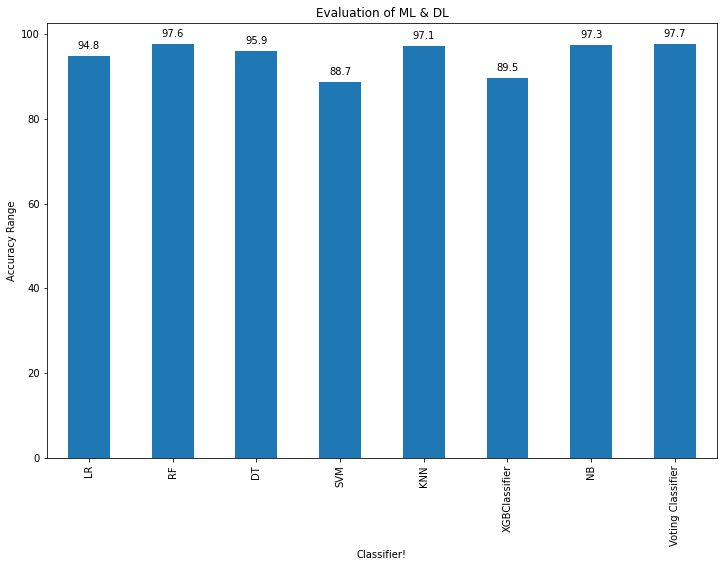

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [LR,val1,val2,val3,val4,val5,val6,val7]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['LR','RF','DT','SVM','KNN','XGBClassifier','NB','Voting Classifier']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()

In [35]:
import joblib
filename = 'model.sav'
joblib.dump(vot_hard, filename)

['model.sav']